In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('iris2.csv')
data.head()
X = data.drop(['Species'],axis=1)
y = data.loc[:,'Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [3]:
#establish knn model and calculate the accuracy
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X, y)
y_pred = KNN.predict(X)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96


In [17]:
from sklearn.preprocessing import StandardScaler
X_morm = StandardScaler().fit_transform(X)

#culculate the mean and sigma of the data
x1_mean = X.loc[:,'SepalLengthCm'].mean()
x1_morm_mean = X_morm[:,0].mean()
x1_sigma = X.loc[:,'SepalLengthCm'].std()
x1_morm_sigma = X_morm[:,0].std()

print("x1_mean:", x1_mean)
print("x1_morm_mean:", x1_morm_mean)
print("x1_sigma:", x1_sigma)
print("x1_morm_sigma:", x1_morm_sigma)


x1_mean: 5.843333333333334
x1_morm_mean: -4.736951571734001e-16
x1_sigma: 0.8280661279778629
x1_morm_sigma: 1.0


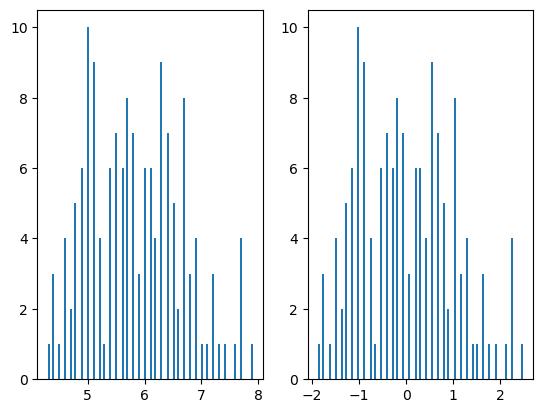

In [14]:
from matplotlib import pyplot as plt

fig1 = plt.figure()
plt.subplot(1,2,1)
plt.hist(X.loc[:,'SepalLengthCm'],bins=100)
plt.subplot(1,2,2)
plt.hist(X_morm[:,0],bins=100)
plt.show()

In [19]:
#PCA analysis on Iris dataset

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_morm)
print(X_pca.shape)
print(pca.explained_variance_ratio_)
var_ratio = pca.explained_variance_ratio_

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


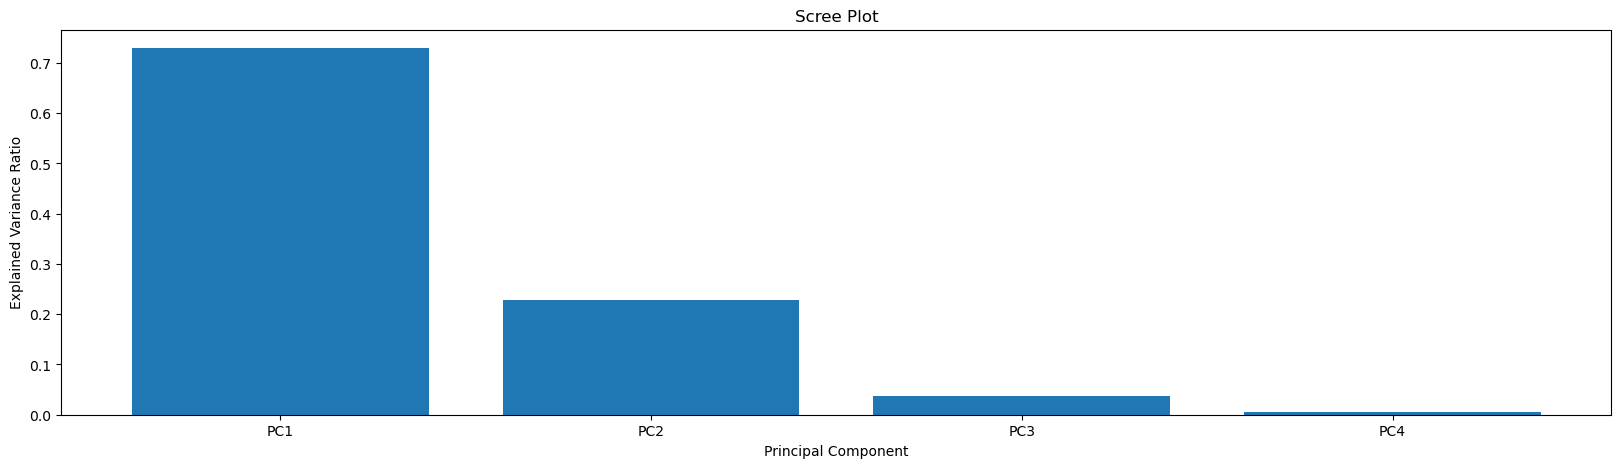

In [20]:
fig2 = plt.figure(figsize=(20, 5))
plt.bar([1, 2, 3,4],var_ratio)
plt.xticks([1, 2, 3,4], ['PC1', 'PC2', 'PC3', 'PC4'])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_morm)
X_pca.shape

(150, 2)

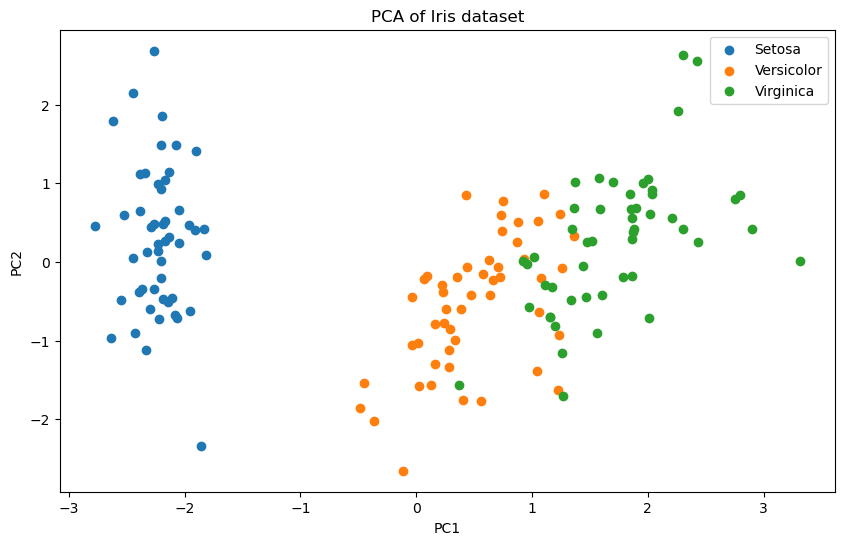

In [31]:
fit3 = plt.figure(figsize=(10, 6))
setosa = plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0])
versicolor = plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1])
virginica = plt.scatter(X_pca[:, 0][y==2], X_pca[:, 1][y==2])

plt.legend((setosa, versicolor, virginica), ('Setosa', 'Versicolor', 'Virginica'))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris dataset')
plt.show()

In [32]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_pca, y)
y_pred = KNN.predict(X_pca)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.9466666666666667
